### Import Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.io as pio

### Data Preparation


In [2]:
files = os.listdir(r"C:\Users\mof8d\Desktop\Analytics\Sales\Data")

In [3]:
all_data = pd.DataFrame()
path = r"C:\Users\mof8d\Desktop\Analytics\Sales\Data"
for file in files:
    current_df = pd.read_csv(path+'/'+file)
    all_data = pd.concat([all_data,current_df])


In [4]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
all_data.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [6]:
all_data.dropna(how='all', inplace=True)

In [7]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
all_data.to_csv('all_data.csv', index=False)

In [10]:
all_data.shape

(372610, 6)

In [11]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [12]:
'04/19/19 08:46'.split('/')[0]

'04'

In [13]:
def month(date):
    return date.split('/')[0]

In [14]:
all_data['month'] = all_data['Order Date'].apply(month)

In [15]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [16]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [17]:
all_data['month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [18]:
filter = all_data['month']=='Order Date'
all_data = all_data[~filter]

In [19]:
all_data['month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [20]:
all_data['month'] = all_data['month'].astype('int')

In [21]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int64
dtype: object

In [22]:
all_data['Price Each'] = all_data['Price Each'].astype('float64')

In [23]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')

In [24]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
dtype: object

In [25]:
all_data['sale'] = all_data['Quantity Ordered']*all_data['Price Each']

In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [27]:
monthly_sales = all_data.groupby('month')['sale'].sum()

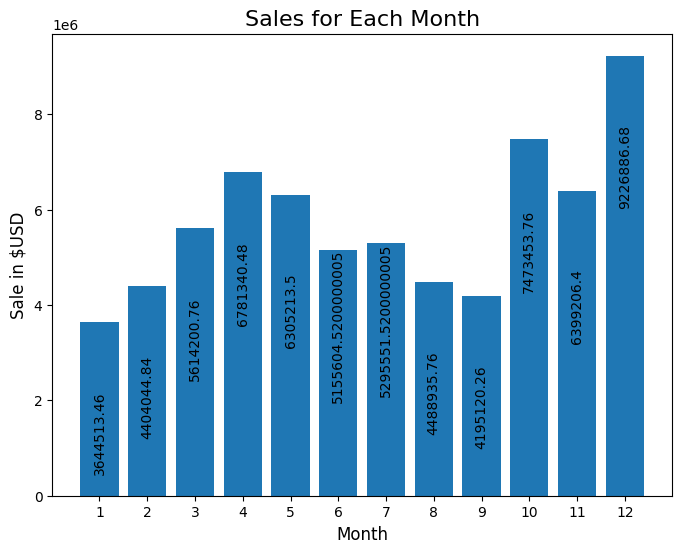

In [28]:
months = range(1,13)
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(months, monthly_sales)
plt.xticks(months)
plt.title('Sales for Each Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sale in $USD', fontsize=12)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, -110), # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                rotation=90)

plt.savefig('Sales for Each Month.jpg', format='jpg', dpi=720)
plt.show()

In [29]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [30]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [31]:
def city(city_name):
    return city_name.split(',')[1]

In [32]:
all_data['city'] = all_data['Purchase Address'].apply(city)

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sale,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [34]:
y = all_data.groupby('city')['city'].count()

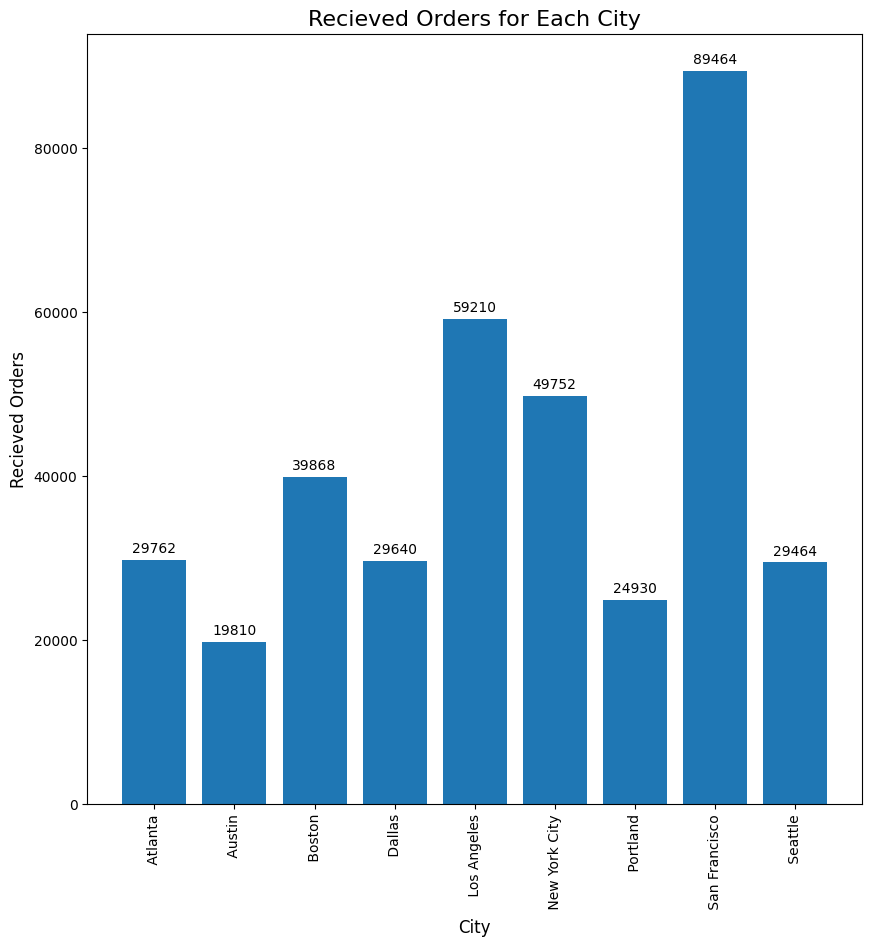

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))
bars = ax.bar(y.index, y)
plt.xticks(rotation='vertical')
plt.title('Recieved Orders for Each City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Recieved Orders', fontsize=12)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.savefig('Recieved Orders for Each City.jpg', format='jpg', dpi=720)
plt.show()

In [36]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sale,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [37]:
all_data['Order Date'].dtype

dtype('O')

In [38]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

C:\Users\mof8d\AppData\Local\Temp\ipykernel_7320\3773881184.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [39]:
keys = []
hour = []
for key, hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

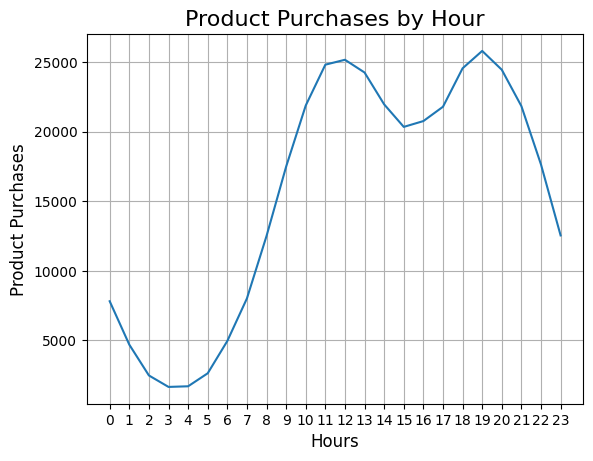

In [40]:
plt.grid()
plt.plot(keys, hour)
plt.title('Product Purchases by Hour', fontsize=16)
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Product Purchases', fontsize=12)
plt.xticks(keys)
plt.savefig('Product Purchases by Hour.jpg', format='jpg', dpi=720)


In [41]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sale,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


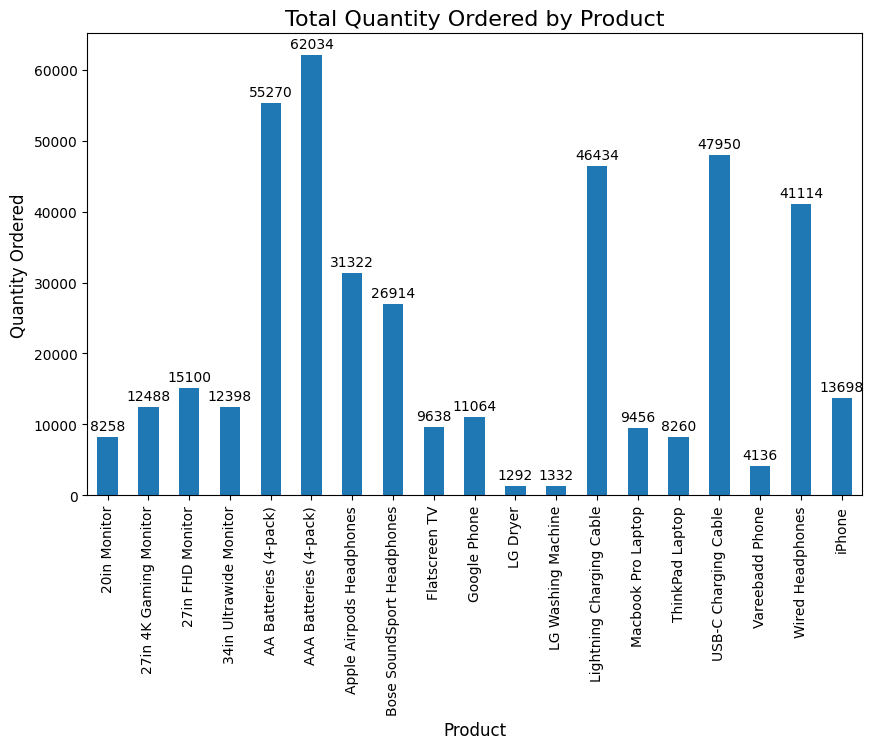

In [42]:
product_quantities = all_data.groupby('Product')['Quantity Ordered'].sum()
ax = product_quantities.plot(kind='bar', figsize=(10, 6))
plt.title('Total Quantity Ordered by Product', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)

for i, (product, quantity) in enumerate(product_quantities.items()):
    ax.annotate(f'{quantity}', 
                xy=(i, quantity), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points", 
                ha='center', va='bottom')

plt.savefig('Total Quantity Ordered by Product.jpg', format='jpg', dpi=300)
plt.show()


In [43]:
quantity = all_data.groupby('Product')['Quantity Ordered'].sum()
product = all_data.groupby('Product')['Quantity Ordered'].sum().index
price = all_data.groupby('Product')['Price Each'].mean()

C:\Users\mof8d\AppData\Local\Temp\ipykernel_7320\2089351185.py:19: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



<Figure size 4000x2400 with 0 Axes>

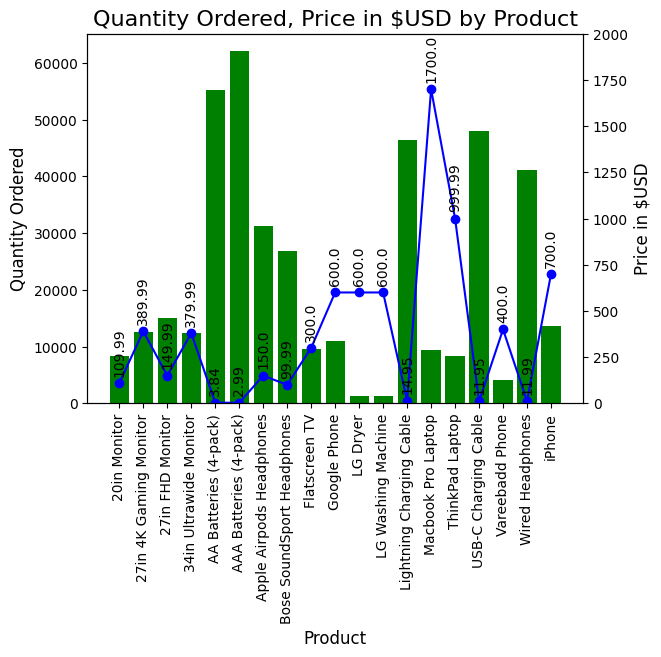

In [44]:

# Ensure these lists have the same length
# product = ['Product A', 'Product B', 'Product C', 'Product D']  # Example products
# price = [10, 15, 7, 12]  # Corresponding prices
# quantity = [100, 150, 70, 120]  # Corresponding quantities

plt.figure(figsize=(40, 24))
fig, ax1 = plt.subplots()

# Create a twin Axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the line (price) on ax2
ax2.plot(product, price, 'b-', marker='o')

# Plot the bar (quantity) on ax1
ax1.bar(product, quantity, color='g')

# Rotate x-axis labels
ax1.set_xticklabels(product, rotation='vertical')


# Add data labels for the line plot
for i, p in enumerate(price):
    ax2.annotate(f'{p}', 
                 xy=(i, p), 
                 xytext=(0, 5),  # 3 points vertical offset
                 textcoords="offset points", 
                 ha='center', va='bottom',
                 rotation=90)

# Add titles and labels
plt.title('Quantity Ordered, Price in $USD by Product', fontsize=16)
ax1.set_xlabel('Product', fontsize=12)
ax1.set_ylabel('Quantity Ordered', fontsize=12)
ax2.set_ylabel('Price in $USD', fontsize=12)
ax2.set_ylim(0, 2000)

# Save the plot as a high-quality JPG file
plt.savefig('Quantity Ordered, Price in $USD by Product.jpg', format='jpg', dpi=720)

# Display the plot
plt.show()


In [45]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [46]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sale,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [47]:
df['goruped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [48]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sale,city,Hour,goruped
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,"USB-C Charging Cable,USB-C Charging Cable"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,"Wired Headphones,Wired Headphones"


In [49]:
df2 = df.drop_duplicates(subset='Order ID')

<Axes: ylabel='count'>

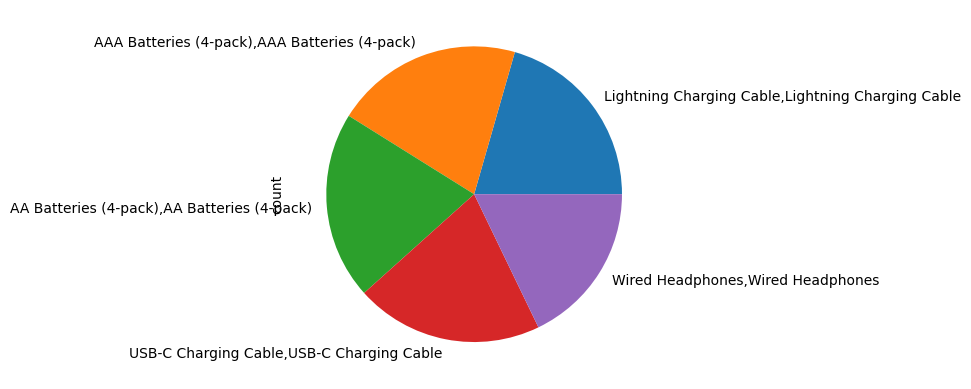

In [50]:
df2['goruped'].value_counts()[0:5].plot.pie()

In [51]:
values = df['goruped'].value_counts()[0:5]
labels = df['goruped'].value_counts()[0:5].index


In [52]:
trace = go.Pie(labels=labels, values=values,
       hoverinfo='label+percent', textinfo='value',
       pull=[0,0,0.1,0.1,0])

In [53]:
iplot([trace])

In [54]:
# fig = go.Figure(data=[trace])
# pio.write_image(fig, 'pie_chart.jpg', format='jpg')